# **Data Understanding 🌟**

#### Project Explaination 🦺

The goal is to predict passenger satisfaction and use the insights to improve key business metrics such as customer retention, revenue per flight, and operational efficiency. By understanding what drives satisfaction, airlines can target specific areas for improvement and personalize the passenger experience.

#### About Dataset 📚

***Context***

US Airline passenger satisfaction survey

***Content***

"Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)"

Age: The actual age of the passengers

Gender: Gender of the passengers (Female, Male)

"Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)"

"Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)"

Customer Type: The customer type (Loyal customer, disloyal customer)

Flight distance: The flight distance of this journey

"Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)"

Ease of Online booking: Satisfaction level of online booking

Inflight service Satisfaction level of inflight service

Online boarding: Satisfaction level of online boarding

Inflight entertainment: Satisfaction level of inflight entertainment

Food and drink: Satisfaction level of Food and drink

Seat comfort: Satisfaction level of Seat comfort

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Baggage handling: Satisfaction level of baggage handling

Gate location: Satisfaction level of Gate location

Cleanliness: Satisfaction level of Cleanliness

Check-in service: Satisfaction level of Check-in service

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Flight cancelled: Whether the Flight cancelled or not (Yes, No)

Flight time in minutes: Minutes of Flight takes

***Source***

https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

### -------------------------------------------------------------------------------------------------------------

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

In [42]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

# รวมข้อมูล
df = pd.concat([df_train, df_test], ignore_index=True)
df_copy = df.copy()
df_copy

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
129875       25971   78463    Male  disloyal Customer   34  Business travel   
129876       25972   71167    Male     Loyal Customer   23  Business travel   
129877       25973   37675  Female     Loyal Customer   17  Personal Travel   
129878       25974   90086    Male     Loyal Customer   14  Business travel   
129879       25975   34799  Female     Loyal Customer   42  Personal Travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
129875  Business              526                      3   
129876  Business              646                      4   
129877       Eco              828                      2   
129878  Business             1127                      3   
129879       Eco              264                      2   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
129875                                  3  ...                       4   
129876                                  4  ...                       4   
129877                                  5  ...                       2   
129878                                  3  ...                       4   
129879                                  5  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
129875                 3                 2                 4                4   
129876                 4                 5                 5                5   
129877                 4                 3                 4                5   
129878                 3                 2                 5                4   
129879                 1                 2                 1                1   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

### ดูประเภทข้อมูล และรายละเอียดข้อมูล

In [43]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [44]:
df_copy.describe().T

count          mean           std   min  \
Unnamed: 0                         129880.0  44158.700000  31207.377062   0.0   
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight Distance                    129880.0   1190.316392    997.452477  31.0   
Inflight wifi service              129880.0      2.728696      1.329340   0.0   
Departure/Arrival time convenient  129880.0      3.057599      1.526741   0.0   
Ease of Online booking             129880.0      2.756876      1.401740   0.0   
Gate location                      129880.0      2.976925      1.278520   0.0   
Food and drink                     129880.0      3.204774      1.329933   0.0   
Online boarding                    129880.0      3.252633      1.350719   0.0   
Seat comfort                       129880.0      3.441361      1.319289   0.0   
Inflight entertainment             129880.0      3.358077      1.334049   0.0   
On-board service                   129880.0      3.383023      1.287099   0.0   
Leg room service                   129880.0      3.350878      1.316252   0.0   
Baggage handling                   129880.0      3.632114      1.180025   1.0   
Checkin service                    129880.0      3.306267      1.266185   0.0   
Inflight service                   129880.0      3.642193      1.176669   0.0   
Cleanliness                        129880.0      3.286326      1.313682   0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126   0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
Unnamed: 0                         16234.75  38963.5  71433.25  103903.0  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                      414.00    844.0   1744.00    4983.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Ease of Online booking                 2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Online boarding                        2.00      3.0      4.00       5.0  
Seat comfort                           2.00      4.0      5.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
On-board service                       2.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      4.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Inflight service                       3.00      4.0      5.00       5.0  
Cleanliness                            2.00      3.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

### ดู duplicate, missing data

In [45]:
df_copy.duplicated().sum()

0

In [46]:
df_copy.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Unnamed: 0                             0
Online boarding                        0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Food and drink                         0
id                                     0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
satisfaction    

### ดูความ balance ของข้อมูล

In [47]:
sns.countplot(x="satisfaction", data=df_copy)
plt.title("Quantity of each target")

Text(0.5, 1.0, 'Quantity of each target')

Text(0.5, 1.0, 'Quantity of each class')

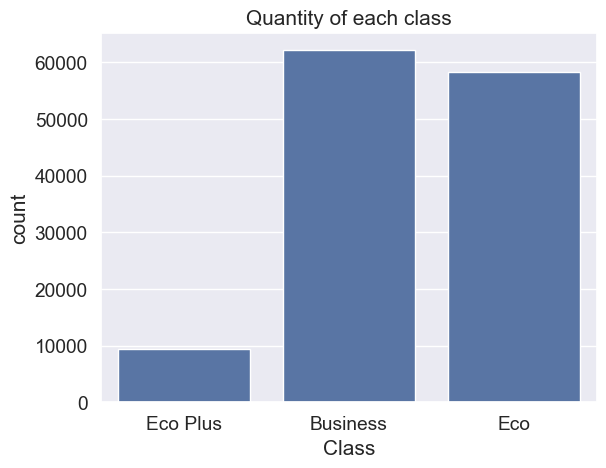

In [48]:
sns.countplot(x="Class", data=df_copy)
plt.title("Quantity of each class")

จะเห็นได้ว่าความ balance ของแต่ละคลาสไม่เท่ากัน เราจึงเล็งเห็นว่าเราควรแบ่งชุดข้อมูลเป็นแต่ละ class เพื่อทำการแบ่งกลุ่มลูกค้าตาม class จะได้ทำการพัฒนาบริการให้ตรงจุดมากยิ่งขึ้น

### ดูการกระจายตัวข้อมูล

In [49]:
numerics = ['int64', 'float64']

train_con_col = df_copy.select_dtypes(include = numerics).columns
train_cat_col = df_copy.select_dtypes(include = "object").columns

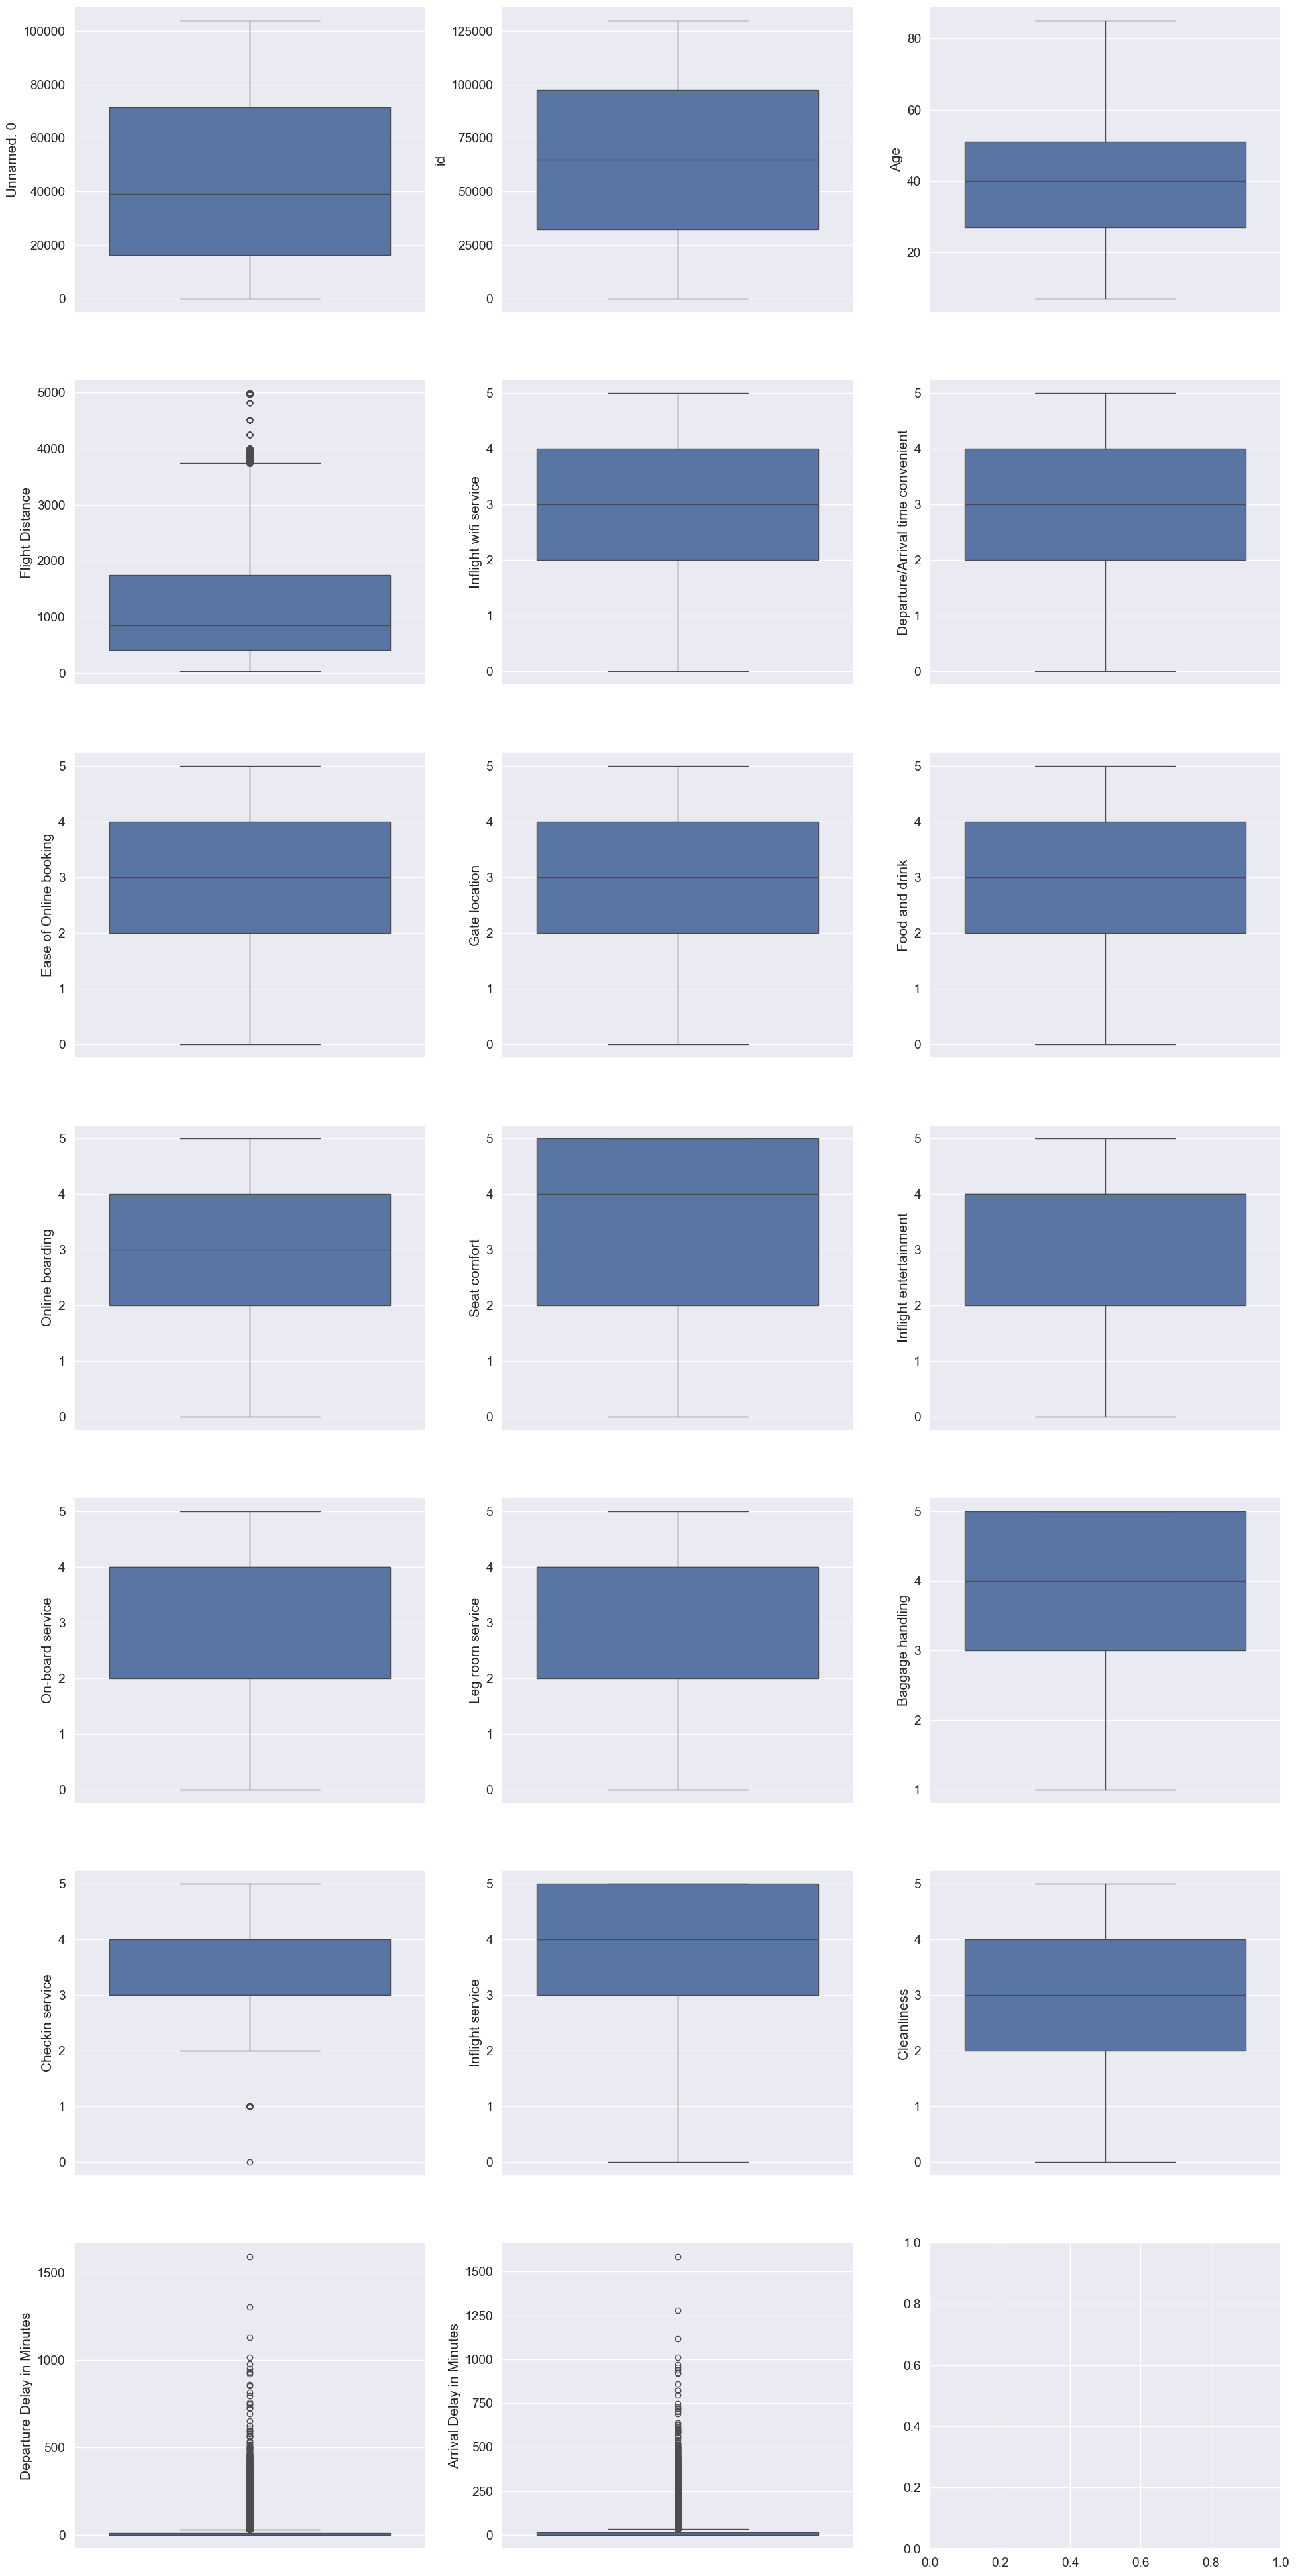

In [50]:
fig, axs = plt.subplots(7, 3, figsize=(20,40))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_copy,y=df_copy[f])

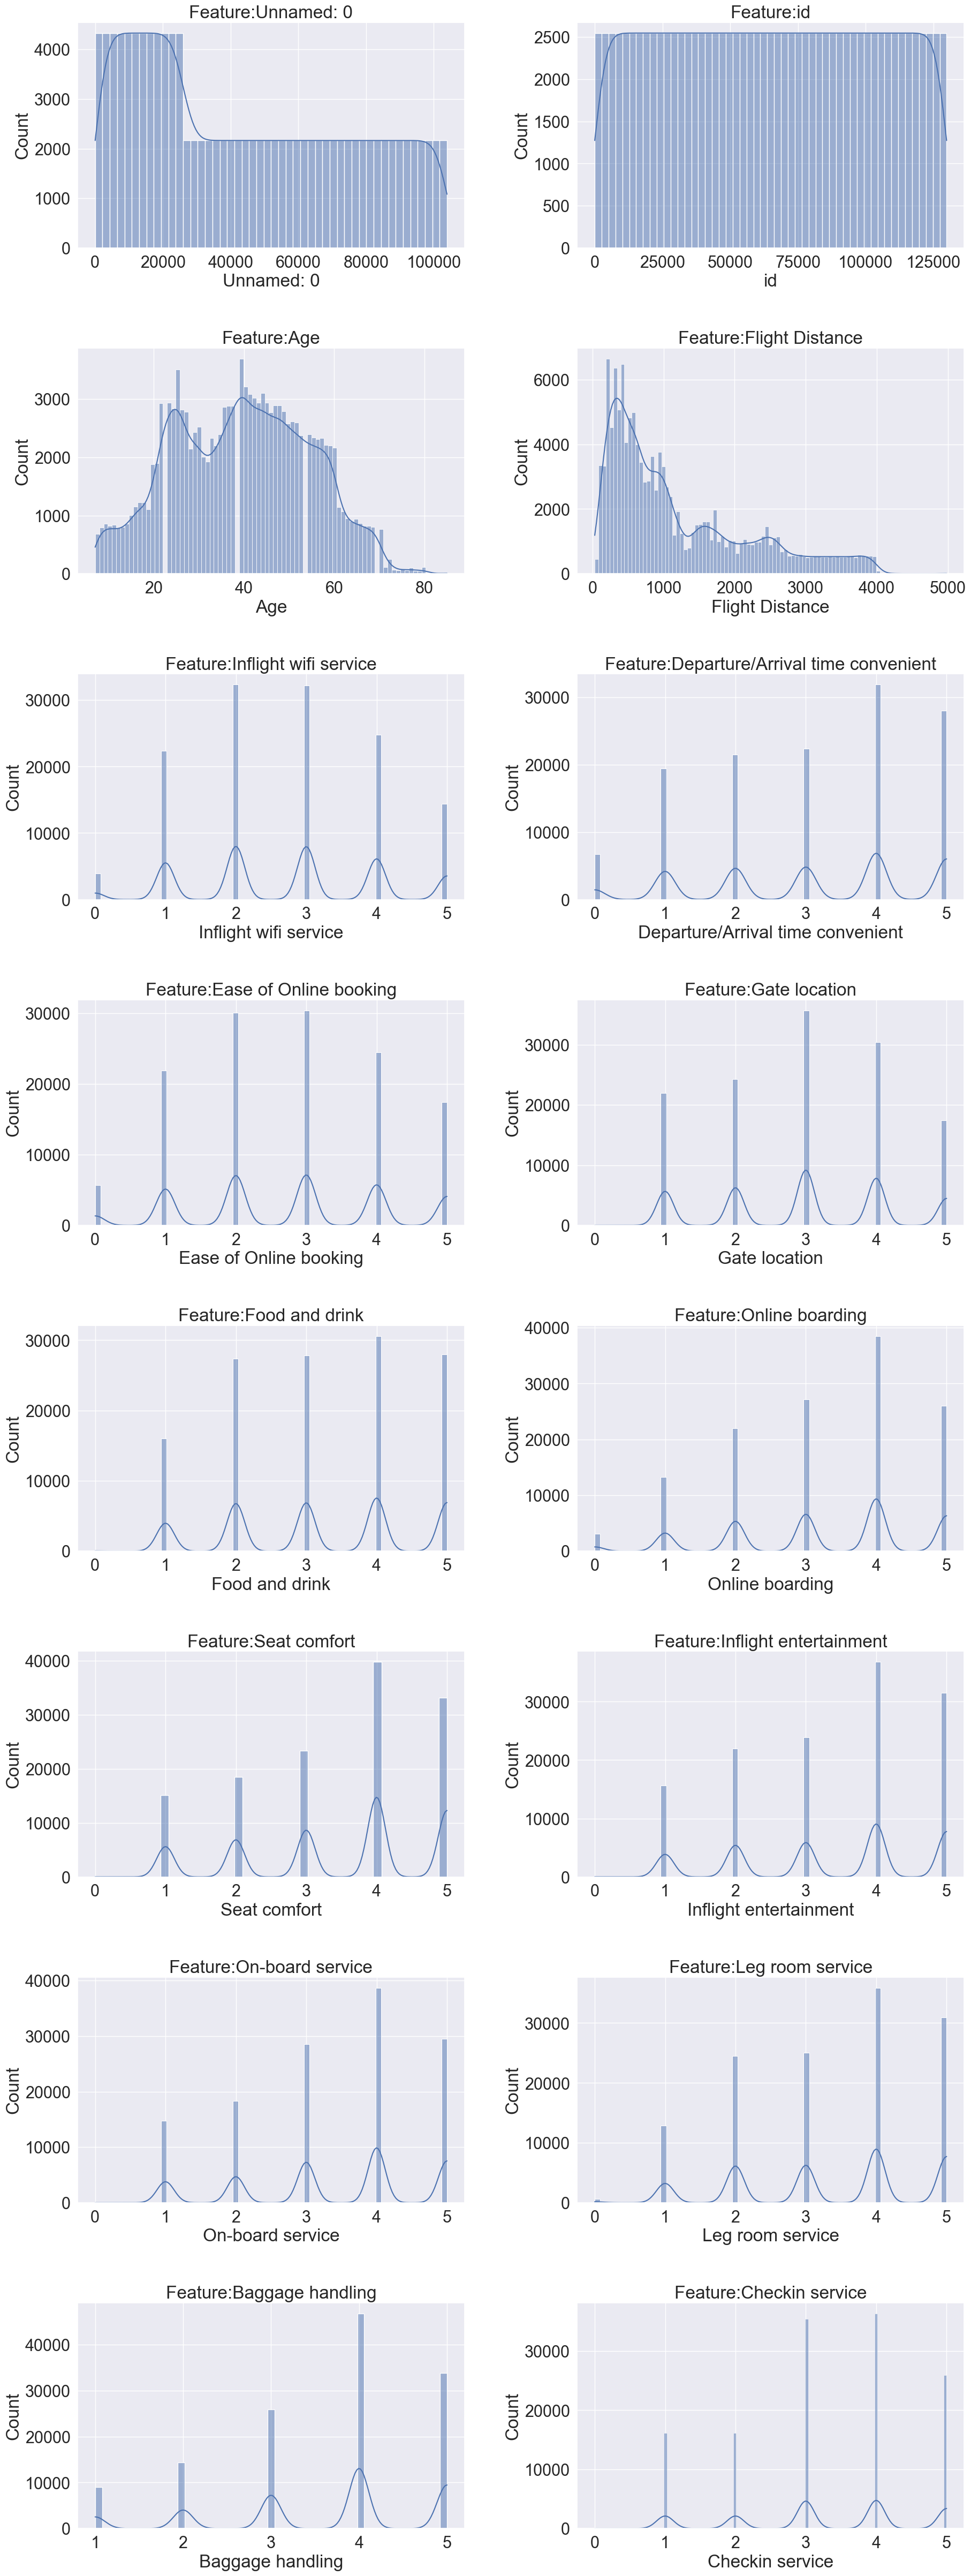

In [51]:
fig, axs = plt.subplots(8, 2, figsize=(20,50))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_con_col, axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df_copy,x=df_copy[f],kde=True)
    ax.set_title('Feature:'+ f)

/var/folders/zl/qwgrf6fs1f76494j7nn83v7w0000gn/T/ipykernel_62436/957318549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Arrival Delay in Minutes'])


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

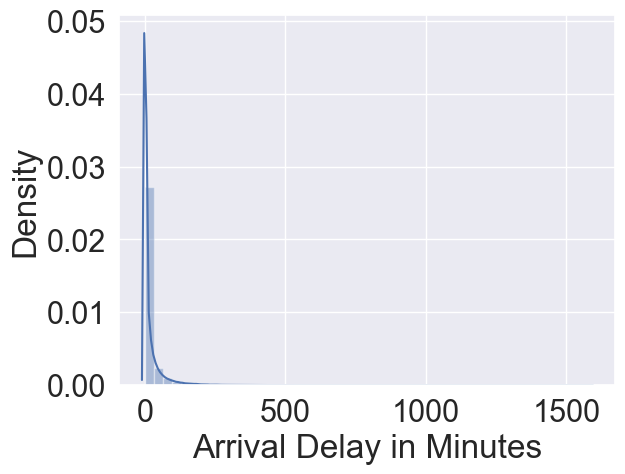

In [52]:
sns.distplot(df_copy['Arrival Delay in Minutes'])

/var/folders/zl/qwgrf6fs1f76494j7nn83v7w0000gn/T/ipykernel_62436/834750658.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Departure Delay in Minutes'])


<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

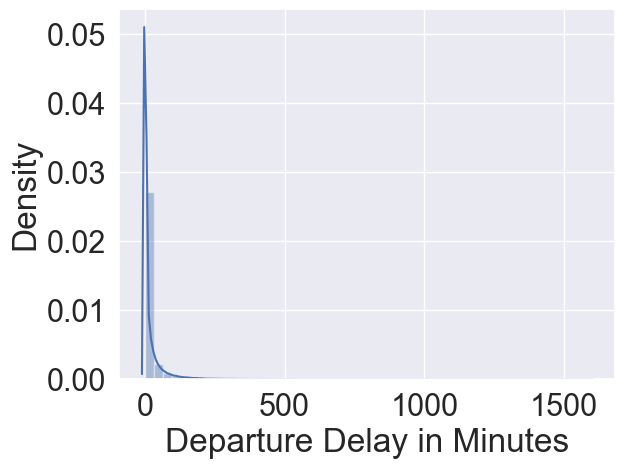

In [53]:
sns.distplot(df_copy['Departure Delay in Minutes'])

### ดู outliers

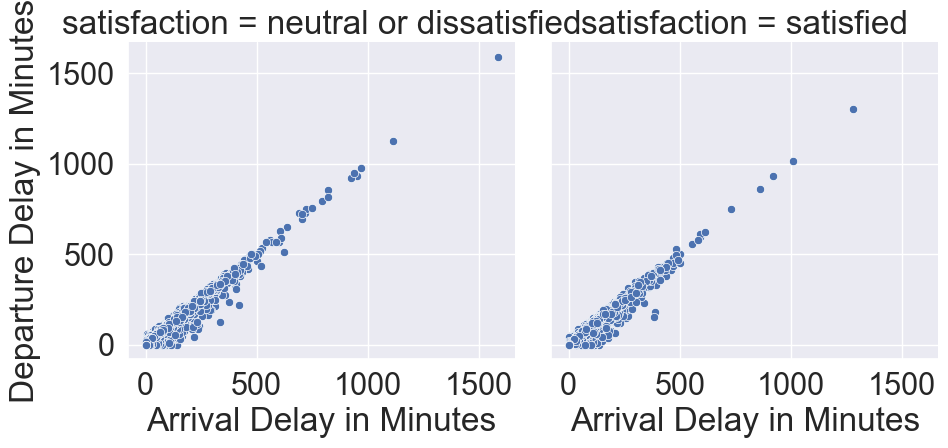

In [55]:
sns.relplot(data=df_copy,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',col='satisfaction')

จะเห็นได้ว่ามี outliers อยู่ ต้องเอาออกเพื่อทำให้การคำนวนตัดสินใจดีขึ้น

### ดูความสัมพันธ์การกระจายตัวของแต่ละ features

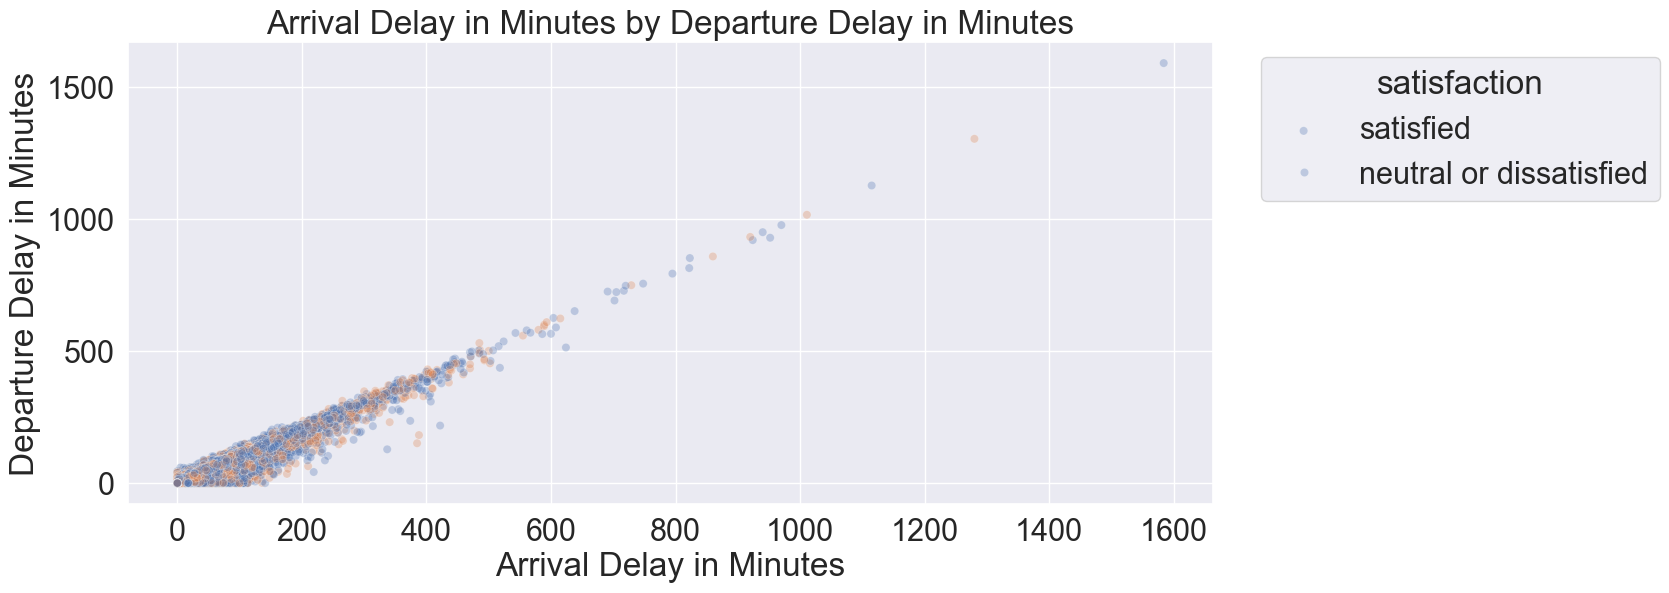

In [56]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = df_copy, x='Arrival Delay in Minutes',y='Departure Delay in Minutes', hue='satisfaction', alpha = 0.3)
plt.legend(title='satisfaction', labels=['satisfied', 'neutral or dissatisfied'], bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.title('Arrival Delay in Minutes by Departure Delay in Minutes')
# plt.savefig('Last Evaluation Score by Satisfaction Level', dpi=300, bbox_inches='tight')
plt.show()

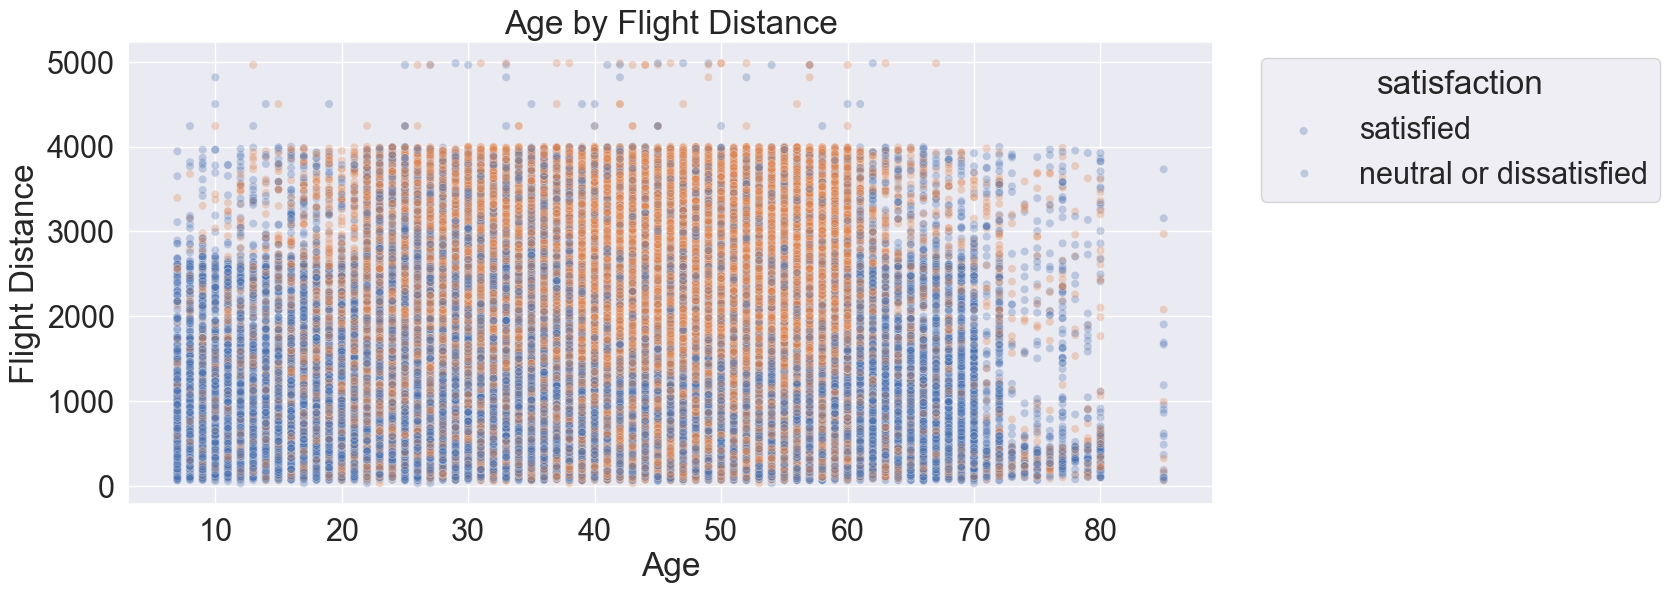

In [57]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = df_copy, x='Age',y='Flight Distance', hue='satisfaction', alpha = 0.3)
plt.legend(title='satisfaction', labels=['satisfied', 'neutral or dissatisfied'], bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.title('Age by Flight Distance')
# plt.savefig('Last Evaluation Score by Satisfaction Level', dpi=300, bbox_inches='tight')
plt.show()

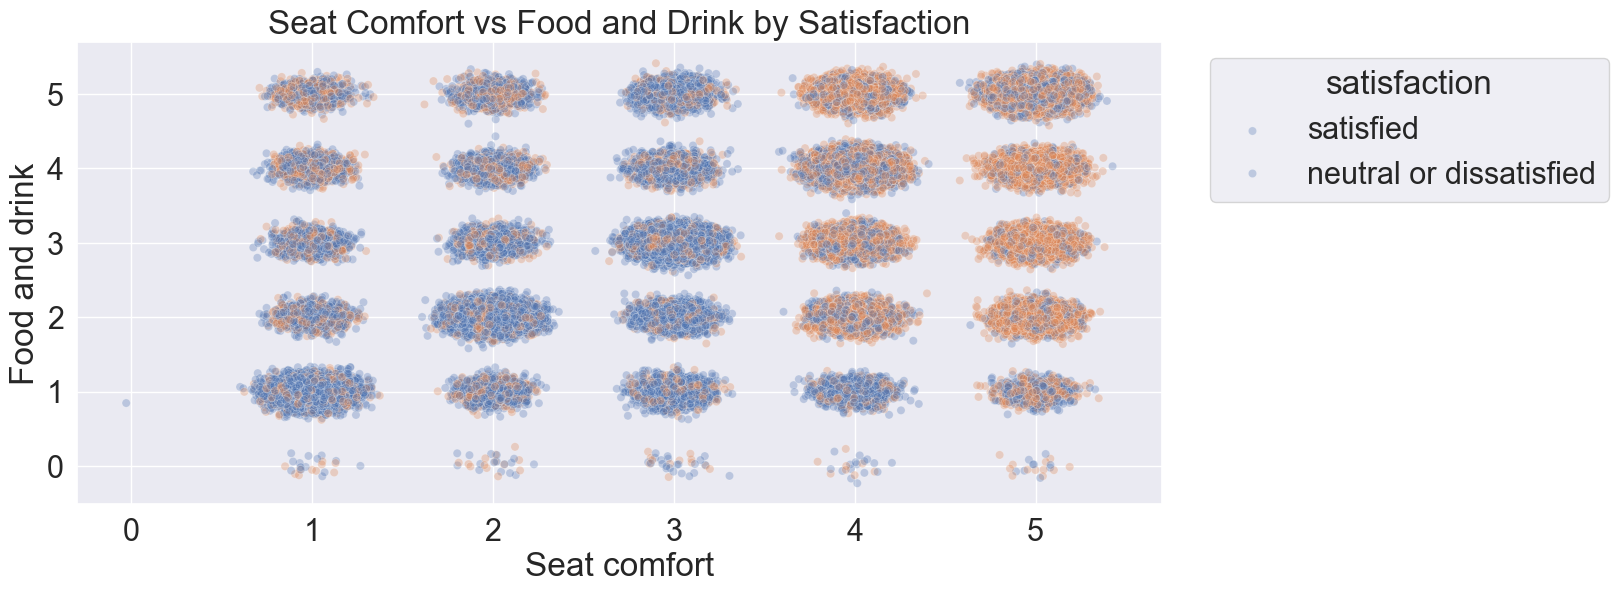

In [58]:
# Adding jitter to 'Seat comfort' and 'Food and drink'
df_copy['Seat comfort jittered'] = df_copy['Seat comfort'] + np.random.normal(0, 0.1, size=len(df_copy))
df_copy['Food and drink jittered'] = df_copy['Food and drink'] + np.random.normal(0, 0.1, size=len(df_copy))

# Creating the scatter plot with jittered values
plt.figure(figsize=(14,6))
sns.scatterplot(data = df_copy, 
                x='Seat comfort jittered',
                y='Food and drink jittered', 
                hue='satisfaction', 
                alpha = 0.3)

plt.legend(title='satisfaction', labels=['satisfied', 'neutral or dissatisfied'], bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xlabel('Seat comfort')
plt.ylabel('Food and drink')
plt.title('Seat Comfort vs Food and Drink by Satisfaction')
plt.show()

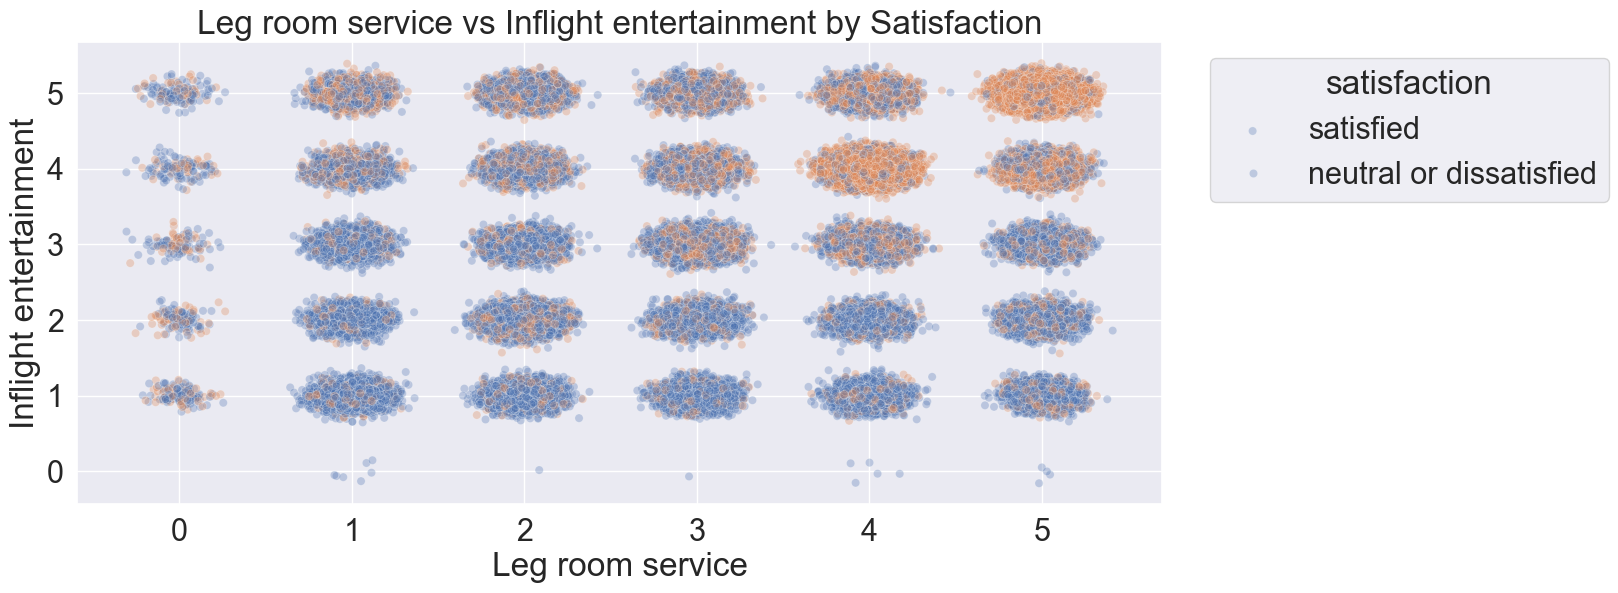

In [59]:
# Adding jitter to 'Seat comfort' and 'Food and drink'
df_copy['Leg room service jittered'] = df_copy['Leg room service'] + np.random.normal(0, 0.1, size=len(df_copy))
df_copy['Inflight entertainment jittered'] = df_copy['Inflight entertainment'] + np.random.normal(0, 0.1, size=len(df_copy))

# Creating the scatter plot with jittered values
plt.figure(figsize=(14,6))
sns.scatterplot(data = df_copy, 
                x='Leg room service jittered',
                y='Inflight entertainment jittered', 
                hue='satisfaction', 
                alpha = 0.3)

plt.legend(title='satisfaction', labels=['satisfied', 'neutral or dissatisfied'], bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xlabel('Leg room service')
plt.ylabel('Inflight entertainment')
plt.title('Leg room service vs Inflight entertainment by Satisfaction')
plt.show()

In [60]:
# Adding jitter to 'Seat comfort' to reduce overlap
df_copy['Seat comfort jittered'] = df_copy['Seat comfort'] + np.random.normal(0, 0.1, size=len(df_copy))

# Creating the scatter plot with jittered Seat comfort values
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_copy, 
                x='Departure Delay in Minutes', 
                y='Seat comfort jittered', 
                hue='satisfaction', 
                alpha=0.3)

# Customize the legend
plt.legend(title='satisfaction', labels=['satisfied', 'neutral or dissatisfied'], bbox_to_anchor=(1.03, 1), loc='upper left')

# Set labels and title
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Seat comfort')
plt.title('Departure Delay in Minutes by Seat Comfort')

plt.show()

### ดูความสัมพันธ์ของข้อมูล

In [61]:
def detail_barplot(category):
    fig, axs = plt.subplots(10, 2, figsize=(20, 60))
    
    fig.tight_layout(pad=3.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_copy)

In [62]:
detail_barplot("Gender")

เห็นได้ว่า gender ไม่มีผลในการทำนาย

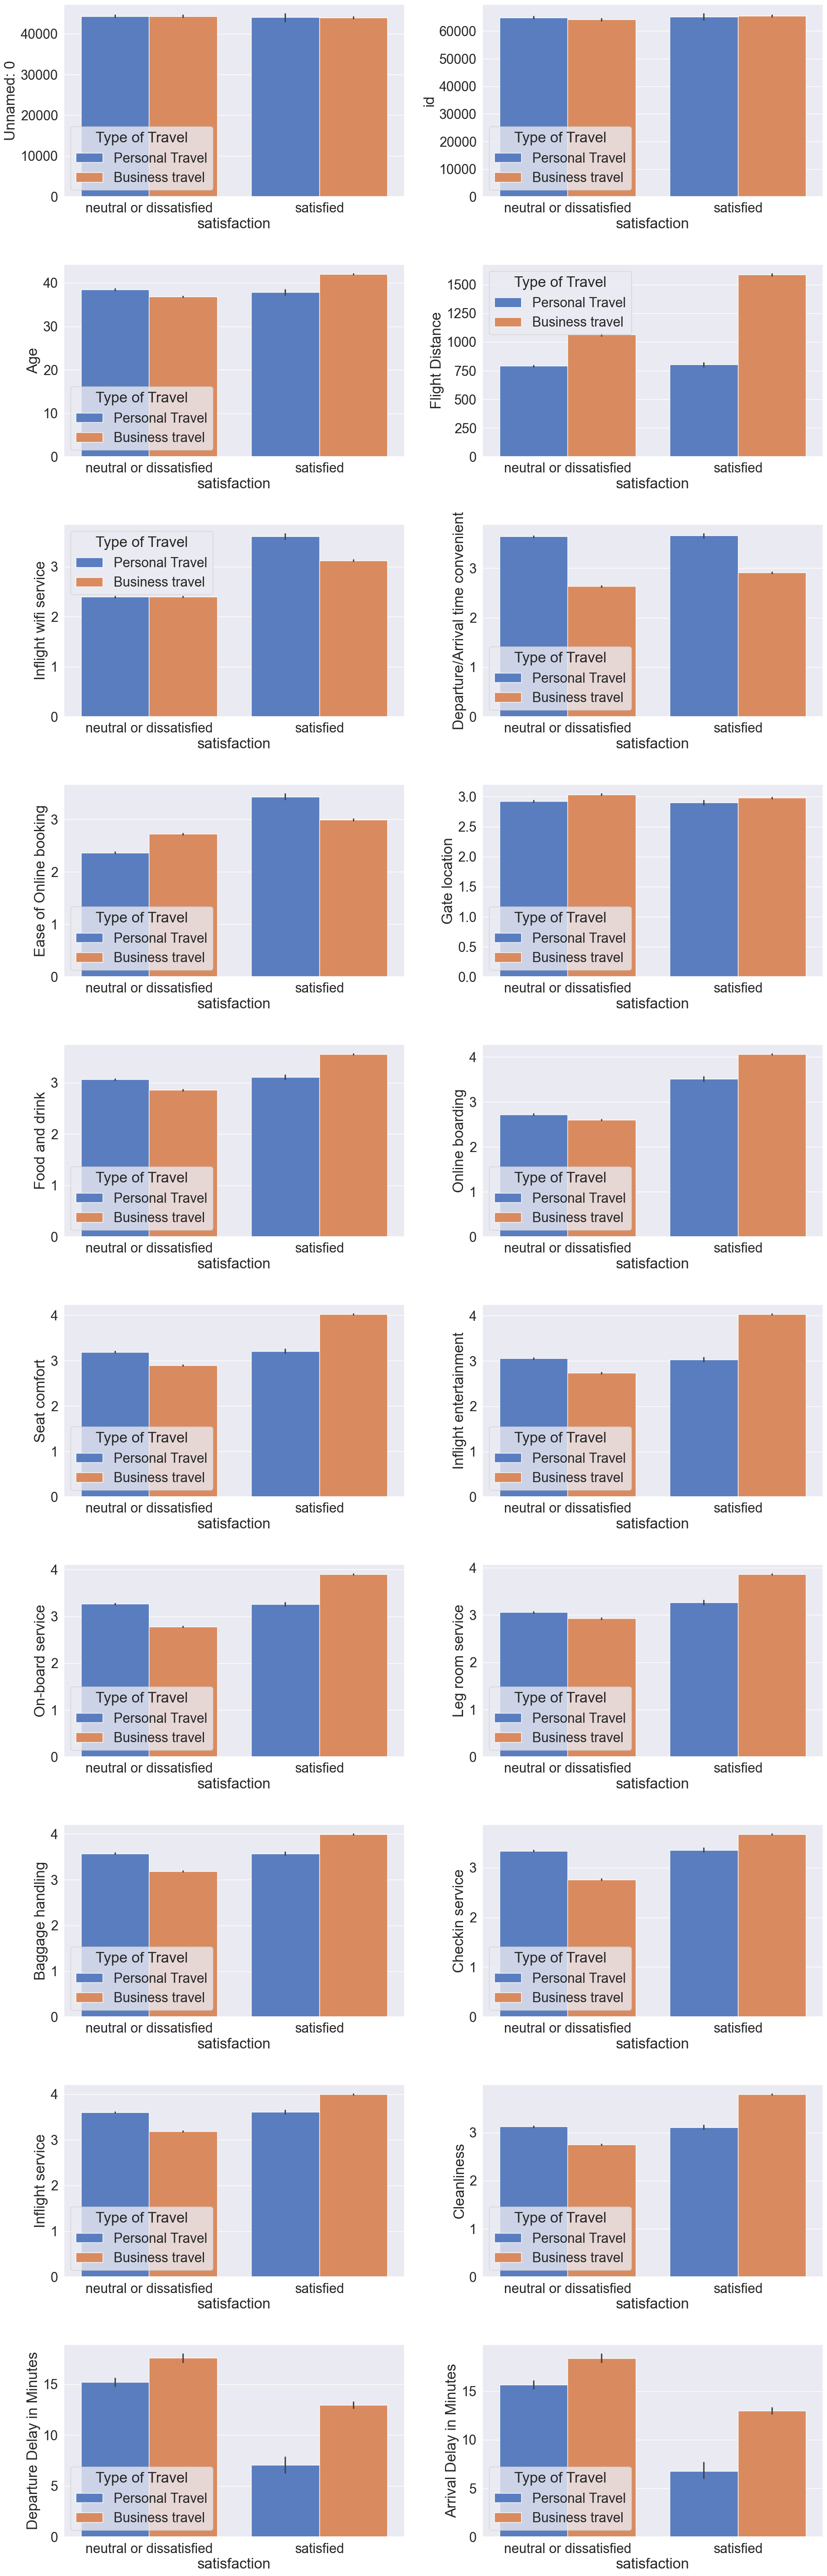

In [63]:
detail_barplot("Type of Travel")

เห็นได้ว่าพอมีผลในการทำนาย

In [64]:
detail_barplot("Customer Type")

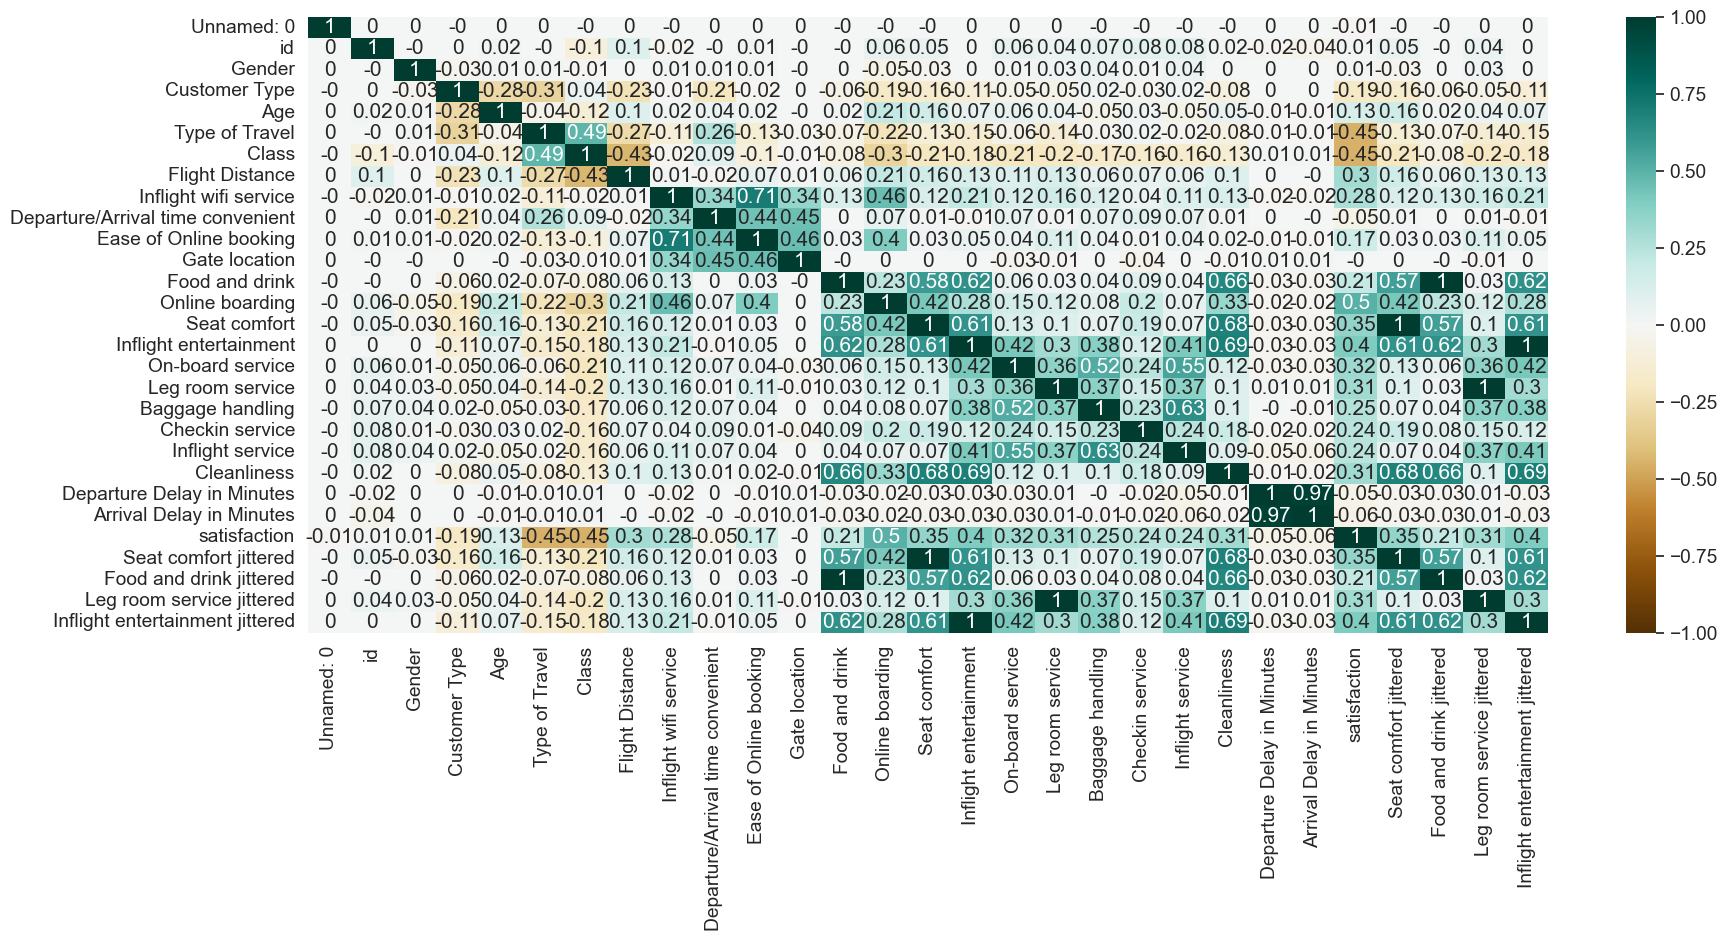

In [65]:
for cat in train_cat_col:
    le = LabelEncoder()
    df_copy[cat] = le.fit_transform(df_copy[cat])

plt.figure(figsize=(20, 8))
sns.set(font_scale = 1.25)
ax = sns.heatmap(df_copy.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='BrBG')

### สรุป

จะเห็นได้ว่ามีบาง feature ที่มีความสัมพันธ์กันต่อกันมาก เช่น Departure Delay กับ Arrival Delay ที่เราต้องเลือกตัดออกอันนึงเพื่อป้องกันปัญหา multicollinearity และรวมถึงบาง feature ก็มีความสัมพันธ์ต่อ target น้อย เช่น gate location ที่เราสามารถตัดออกได้ จะได้ลดความซับซ้อนของโมเดล 

อีกทั้งจากข้อมูลที่เป็น ratings เรานับว่ามันคือ ordinal data ที่ในขั้นตอนการเตรียมข้อมูลต้องทำการ one-hot encoding ทั้งหมดเพราะป้องกันค่ามากได้เปรียบในการทำนายของโมเดล รวมถึง norminal data ที่เป็น category ต่าง ๆ ก็ต้องทำเช่นกัน

สุดท้ายต้องทำการตัด outliers, แก้ missing data อีกด้วย